<a href="https://colab.research.google.com/github/Existanze54/sirius-neural-networks-2024/blob/main/Lections/04L_CNNinBio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Примеры архитектур нейронных сетей для работы с изображениями

## AlexNet

Обычная сверточная нейронная сеть. В те годы главное достижение было в том, что ее смогли запустить и обучить. Так-то свертки появились задолго до этого

<img src="https://data.bioml.ru/htdocs/courses/bioml/neural_networks/cnn/img/example_alexnet.png" width="900">

Практического интереса для классификации изображений не представляет. Но на простой задаче может хватить и подобной архитектуры


## VGG

Следующая известная нейронная сеть

<img src ="https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6" width="900">

В ней авторы первыми использовали концепцию "блока" - архитектура нейросети не подбирается перебором всего что только можно, а складывается из известных блоков.







Кроме того, авторы предложили заменять конволюции с большими ядрами  конволюциями с меньшими ядрами, но увеличивая число самих слоев конволюции таким образом, чтобы рецептивное поле осталось тем же

<img src ="https://data.bioml.ru/htdocs/courses/bioml/neural_networks/cnn/img/receptive_field_2d.png" width="900">

Таким образом конволюция 5x5 может быть заменена двумя конволюциями 3x3, что уменьшит число параметров. А так как между конволюциями мы добавляем функции активации - увеличит нелинейность выучиваемого решения.

У VGG хорошие признаки, которые она выучивает, потому ее использовали в различных приложениях, в том числе для сравнения картинок и переноса стиля.

## GoogLeNet


Главная идея данной нейросети - это то, что мы можем обрабатывать изображение в пределах одного блока, но в несколько потоков. Это позволяет использовать конволюции разного размера, а алгоритм обратного распространения ошибки вполне позволяет нам учить такого вида нейросети

Главное - чтобы эти потоки выдавали признаки с одинаковой размерностью WxH

<img src ="https://images.deepai.org/django-summernote/2019-06-18/5ebad056-29d3-4f4c-bef1-2f262388afb0.png" width="900">

Далее мы просто объединяем их по каналами. Добиваемся совпадения размеров за счет padding




### Downsampling

Но возникает проблема - в наивной версии может очень сильно расти число каналов. Если на входе у нас было 192 каналов и даже если мы не увеличиваем их число конволюциями - на выходе будет 192 * 4 каналов. Пару таких операций - и нам не хватит никакой памяти.

Потому блок, названный Inception, был реализован несколько иначе, чем на предыдущем рисунке.


<img src ="http://media5.datahacker.rs/2018/11/inception_module.png" width="900">

Пусть на выходе мы хотим получить 256 каналов.

На вход мы получили 192 канала.
Берем и с помощью 1x1 конволюций в каждой ветви уменьшаем число каналов.
В одной ветви до этого делаем maxpooling, в одной - ничего, в двух других после этого применям конволюции, увеличивающие число каналов.

В итоге всегда можно подобрать параметры так, чтобы на выходе получить требуемое число каналов.




#### 1x1 Convolution

Это первая архитектура, где мы видим использование 1x1 конволюции.

Стоит пояснить, что эта конволюция фактически равносильна применению линейного слоя к значениям в каналах, стоящих на одной и той же позиции. Это позволяет эффективно комбинировать разные признаки в более сложные, при этом не вводя в нейросеть линейные слои напрямую

<img src ="https://miro.medium.com/max/1400/1*dNaikOfrGzUaJ2EzRIl4tw.png" width="900">



## Проблема с очень глубокими нейросетями




Далеее люди столкнулись со следующей проблемой - с какого-то момента нейросеть с бОльшим числом весов на ОБУЧЕНИИ вела себя хуже, чем нейросеть с меньшим числом весов.

Этого казалось бы быть не должно, но наблюдалось на практике
<img src="https://kodomo.fbb.msu.ru/FBB/year_21/more_layers_wonthelp.png" width="500px">  

### Затухание градиента



Это возникает из-за проблемы, известной как затухание градиента - вв ходе обратного распространения ошибки, градиент может в силу ряда причин становиться все меньше и меньше, окончательно затухая к начальным слоям нейросети
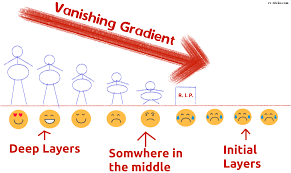


## ResNet




Первая ОЧЕНЬ глубокая нейросеть. Достигнуто это за счет двух вещей:

1) добавили в нейросеть BatchNorm, иначе она просто не училась. Его мы разберем на следующей лекции


### Не всегда более сложная зависимость дает лучшее решение


<img src="https://d2l.ai/_images/functionclasses.svg" >

Пример - $$f(x) = w_3x^3 + w_2x^2$$ более сложная функция, чем

$$f(x) = w_1x + w_0$$

Но первую функцию нельзя свести ко второй - будут существовать случаи, когда вторая функция будет работать в качестве аппроксимации, а первая - нет

Пример - $$f(x) = w_3x^3 + w_2x^2 + w_1x + w_0$$ более сложная функция, чем

$$f(x) = w_1x + w_0$$

И если нам не нужны  степени x выше первой для решения задачи, то мы просто говорим, что

$$w_3 = w_2 = 0$$

При усложнение нейросети, у нее должна оставаться **возможность проигнорировать добавленную сложность и свести себя к более простому решению**.

Например, хорошо, если нейросеть может делать так, что дополнительные слои дают **нулевой вклад** в предсказание

### Residual connections



Для этого в нейросеть можно добавить residual connections


<img src="https://d2l.ai/_images/residual-block.svg" width="500px">

А именно - выход предыдущего блока суммируется с выходом текущего. За счет этого нейросеть может решить, что какой-то блок ей в принципе не нужен и он просто будет выдавать тождественный 0.

Фактически - мы даем нейросети заранее много блоков подряд, соединенных таким образом. А она сама решает - использовать ей их все или часть выкинуть.



Конкретно в случае с ResNet residual блоки выглядят так.

<img src="https://d2l.ai/_images/resnet-block.svg" width="500px">

Второй вариант используется в глубоких вариациях ResNet

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/grad_resnet.png" width="300px">  


За счет этого получилось делать огромные нейросети


<img src ="https://data.bioml.ru/htdocs/courses/bioml/neural_networks/cnn/img/example_resnet_vgg.png" width="1200">


Часто в прикладных задачах используют нейросеть с 34 слоями.

Но на ImageNet выступал ResNet с 152 слоями (а можно делать еще больших монстров - была бы память. Хотя прирост качества с какого-то момента минимален)

ResNet с 34 слоями - частый начальный выбор для многих задач, связанных с изображениями. Учить его не очень сложно, поведение предсказуемо и он дает хорошее качество

### Поверхность функции ошибки

Оказывается, skip-connections сильно упрощают поверхность функции ошибки - в результате градиентному спуску намного легче найти решение

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/loss_landscape.png" width="500px">  

## DenseNet




Вместо сложения можно конкатенировать вход и выход слоя. Так делают в [DenseNet](https://arxiv.org/abs/1608.06993)

<img src ="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs12559-020-09776-8/MediaObjects/12559_2020_9776_Fig5_HTML.png" width="600">

Основная идея - в пределах блока сети переиспользовать feature map. Что это значит - слой получает не только выход предыдущего слоя, но сконкатенированный выход всех предыдущих слоев.

Почему это может давать бонус?
Часто для построения нового признака нам нужны не только высокоуровневые признаки, но и более низкоуровневые. В итоге в стандартной архитектуре нейросеть будет использовать часть фильтров для "хранения" хороших низкоуровневых признаков с предыдущих слоев. А так она может сосредоточиться на вычислении новых признаков.



Оказывается, это еще больше улучшает сходимость.





Правда, работает такая нейросеть дольше и потому используют ее реже

## Улучшения ResNet

Обзор небольшой здесь - https://www.youtube.com/watch?v=KWuHPCDx7Bk

### Depthwise и Depthwise-separable convolutions

Параметров в конволюции в сравнении с обычным линейным слоем мало. Но это все равно порой много и не нужно.

Потому можно жульничать

Depthwise-конволюция

<img src="https://miro.medium.com/max/640/1*Esdvt3HLoEQFen94x29Z0A.png" width="500px">

Depthwise separable-конволюция

<img src="https://miro.medium.com/max/720/1*JwCJCgN2UreEn3U1nwVj8Q.png" width="500px">

#### Squeeze-and-Excitation block

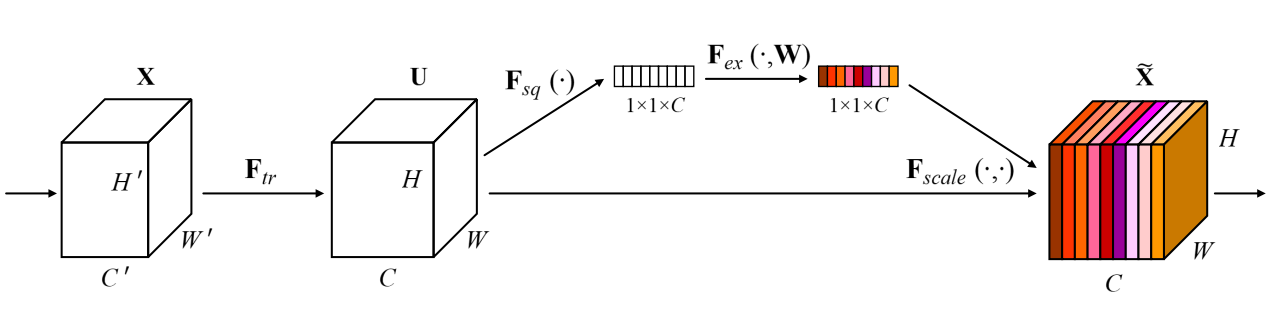

#### Inverted resnet block

Вместо того, чтобы на внутреннем слое сжимать представление, а потом расжимать - сделаем наоборот



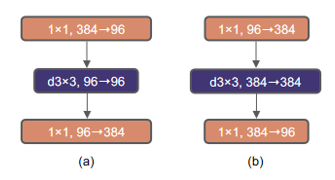

#### GeLU


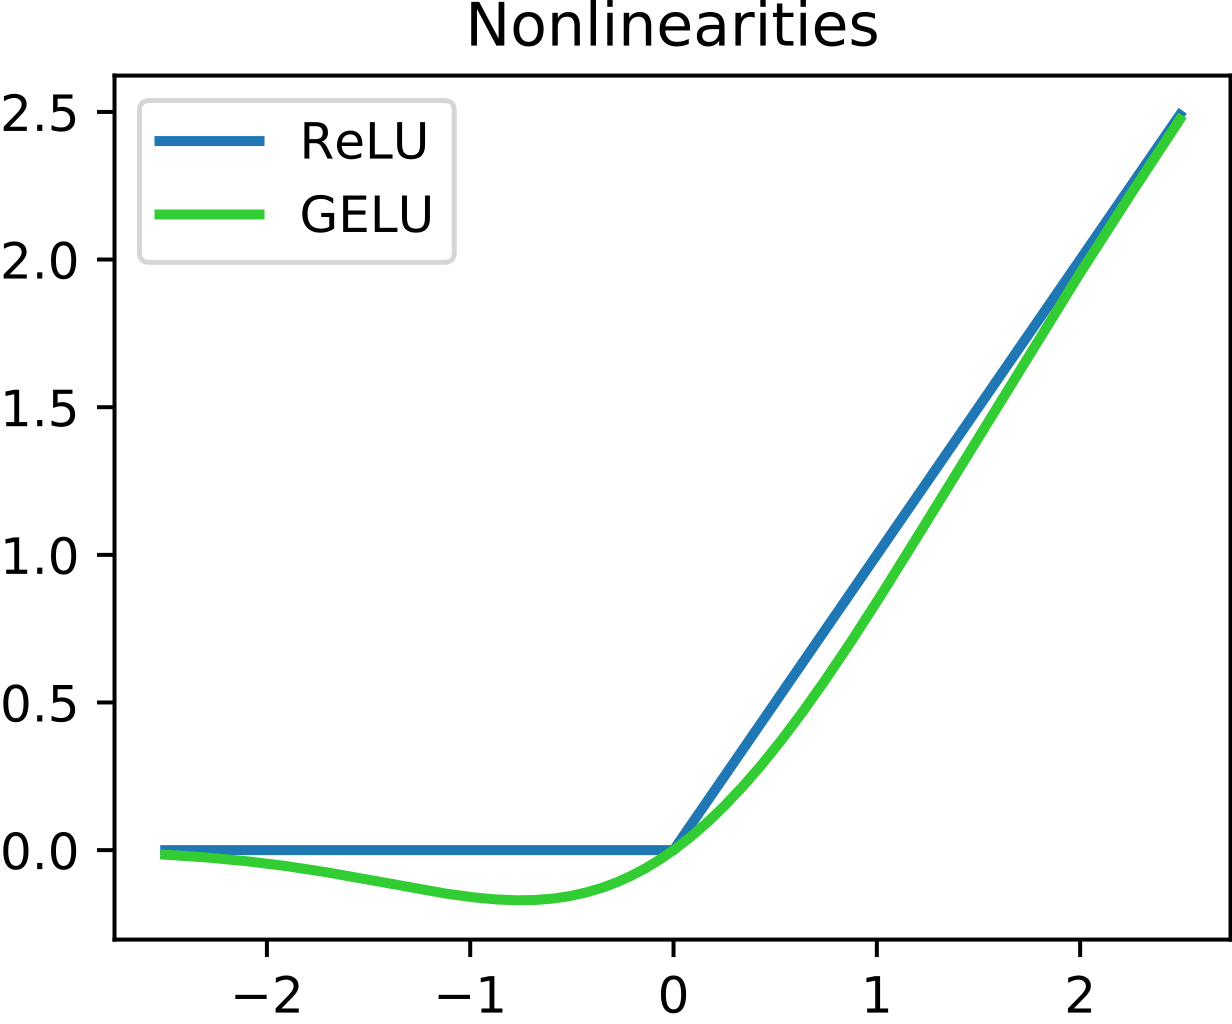

### Аугментация



<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs40537-019-0197-0/MediaObjects/40537_2019_197_Fig3_HTML.jpg?as=webp">



<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs40537-019-0197-0/MediaObjects/40537_2019_197_Fig4_HTML.jpg?as=webp">

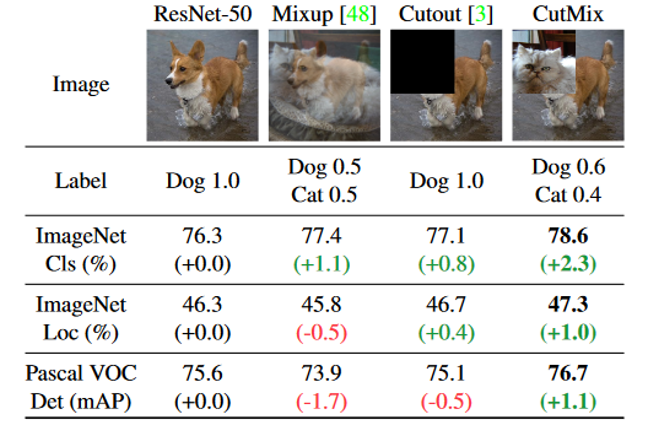

#### Label smoothing

Добавляем к нашим one-hot классам небольшой шум, вместо 1 target классу ставим меньшее значение $\epsilon$, а к остальным классам добавляем $\epsilon / (k-1)$

В частности, помогает бороться вот с этим:
https://labelerrors.com/

## Многообразие архитектур

Архитектур для классификации изображений великое множество. Часть из них считаются быстрее, часть из них дают результат точнее. В большинстве случаев вам хватит ResNet, потому рассматривать все эти архитектуры мы не будем

<img src ="https://kodomo.fbb.msu.ru/FBB/year_20/ml/many_arch.png" width="900">



И это еще не все.

Например, сейчас популярные архитектуры - это ConvNeXt, основанный на ResNet.

И EfficientNetV2 - сверточная сеть, архитектуры которой была получена при помощи NAS - neural architecture search.

По картинке видно, что эти архитектуры легко бьют архитектуры, основанные на трансформерах. Особенно характерна в этом плане EfficientNetV2, не отличающаяся сильно по числу операций от ResNet (сравните с трансформерами). Потому рассказы об универсальной архитектуре трансформеров (будут разобраны в одной из следующих лекций) несколько преувеличины

<img src="https://drive.google.com/uc?export=view&id=1EzgT93HBIDM_Oa9GtwbjhEY3cq3tfMXh" width=500px>

# Применение сверточных нейронных сетей в биологии

## Анализ медицинский изображений

Самое очевидное - их можно применять к тому же, в чем они и в общем успешны.




### Классификация клеток крови

![blood_cell_classification](https://data.bioml.ru/htdocs/courses/bioml/neural_networks/bioml/img/examples/example_blood_cell_classification_10.1007_s42979-021-00458-2.webp)

[ссылка на статью](https://link.springer.com/article/10.1007%2Fs42979-021-00458-2)


### Диагностика опухолей

![brain_tumor_diagnosis](https://data.bioml.ru/htdocs/courses/bioml/neural_networks/bioml/img/examples/example_brain_tumor_diagnosis_10.3390_brainsci11030352.jpg)

[ссылка на статью](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8001442/)


### Сегментация изображений. U-Net

Активно применяются нейронные сети и для сегментации медицинских изображений.

Особо известная архитектура из использущихся - U-Net

![unet](https://data.bioml.ru/htdocs/courses/bioml/neural_networks/autoencoders/img/ae_unet.png)

Основная идея - мы анализируем изображение сразу на разных масштабах, а потом объединям признаки с разных уровней. Это очень похоже на DenseNet по своей идее. Не похоже то, что на выходе мы получаем не предсказание, а снова изображение. Только не изначальное, а его сегментацию на интересующие нас регионы.

[ссылка на изначальную статью](https://arxiv.org/abs/1505.04597)

[ссылка на статью](https://www.nature.com/articles/s41598-021-87496-1)

## Работа с последовательностями ДНК

Внезапно, можно представлять последовательность ДНК в виде одномерного сигнала с 4 каналами (A, T, G, C).

Далее к такому сигналу можно применять 1d конволюции, получая сверточную нейронную сеть.



### Предсказание связывания транскрипционных фактров

Используя такие нейросети, мы можем точнее предсказывать связывание транскрипционных факторов и их комплексов с ДНК

![motifs_nn](https://data.bioml.ru/htdocs/courses/bioml/neural_networks/bioml/img/examples/example_motifs_nn_10.1038_s41576-019-0122-6.png)

Классический пример такой нейросети - [DeepBind](https://www.nature.com/articles/nbt.3300)

При этом в идеальном случае первый конволюционный слой выучит мотивы факторов. Но часто этого [не произойдет](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6941814/).

В менее идеальном - придется анализировать то, на что реагирует нейросеть в последовательностях и на основе анализа вытаскивать мотивы (если успеем - разберем в одной из следующих лекций).

Аналогично, кроме самой последовательности, к сигналу могут добавляться дополнительные каналы, как это делается, например, в [FactorNet](https://www.nature.com/articles/s41576-019-0122-6)

![factornet](https://data.bioml.ru/htdocs/courses/bioml/neural_networks/bioml/img/examples/example_factornet_10.1016_j.ymeth.2019.03.020.jpg)

Примером может служить deepSea. Данная нейросеть была обучена на данных ENCODE предсказывать по последовательности результаты 919 экспериментов по определению ДНКазной доступности, связывания транскрипционных факторов и других геномных признаков, померенных для разных клеточных линий в разных условиях

### Предсказание последствий однонуклеотидных мутаций в регуляторных регионах

Кроме того, можно выучить нейросеть предсказывать на основе последовательности результаты экспериментов - ChIPSeq, доступность хроматина и т.д

После этого можно предсказывать результаты экспериментов для последовательностей с заменами и на основе разницы с изначальной последовательностью, предсказывать эффекты этих замен.

Так делает DeepSEA

<img src="https://data.bioml.ru/htdocs/courses/bioml/neural_networks/bioml/img/examples/example_deepsea_scheme_10.1038_nmeth.3547.png" width="900"/>

Basenji

<img src="https://data.bioml.ru/htdocs/courses/bioml/neural_networks/bioml/img/examples/example_basenji1_10.1101_gr.227819.117.png" width="800"/>

![basenji-arch](https://data.bioml.ru/htdocs/courses/bioml/neural_networks/bioml/img/examples/example_basenji_architecture.png)

В случае Basenji2 используются данные и человека, и мыши

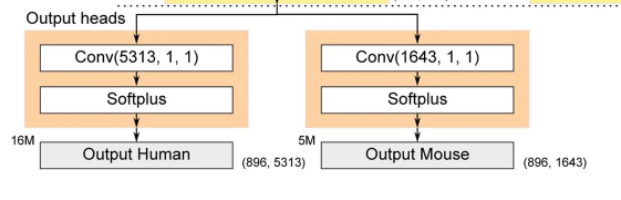

## Работа с последовательностью РНК


Точно также можно работать конволюциями и с последовательностью РНК.





### Предсказание рибопереключателей

Например, в [статье](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7541510/) CNN является частью архитектуры, с помощью которой авторы предсказывают является ли участок рибопереключателем и насколько хорош он в этой роли.

![alttext](https://theaisummer.com/static/1bb28dc710628228f7d7739ec992d307/21b4d/riboregulators.png)


### Предсказание остановки рибосомы

В данной [работе](
https://www.sciencedirect.com/science/article/pii/S240547121730337X) при помощи CNN пыытались предсказывать остановку рибосомы

![alttext](https://kodomo.fbb.msu.ru/FBB/year_20/ml/ribosome_stalling.png)


### Предсказание вторичной структуры РНК

В этой [работе](https://arxiv.org/pdf/2002.05810.pdf) CNN используется как части архитектуры бОльшей сети


![alttext](https://kodomo.fbb.msu.ru/FBB/year_20/ml/E2Efold.png)


### Предсказание сайтов сплайсинга


В [работе](https://www.cell.com/cell/fulltext/S0092-8674(18)31629-5) CNN используется для предсказания сайта связывания.
Используемая CNN представлеят собой немного видоизмененый ResNet  - добавлены дополнительные skip connections от некоторых промежуточных слоев к предпоследнеему. Кроме того, в части слоев вместо обычных конволюций используются dilated.



<img src ="https://kodomo.fbb.msu.ru/FBB/year_20/ml/SpliceAI.png" width="500">


<img src ="https://kodomo.fbb.msu.ru/FBB/year_20/ml/SpliceAI2.jpeg" width="500">

## Применение 3D конволюций в биологии

Отдельно стоит отметить применение конволюций, которые работают с трехмерными объектами. Трехмерные конволюции в принципе применяются реже, так как обучать такие нейросети сложнее, количество параметровв в них растет быстрее и для многих биологических задач, кроме того, свойственно то, что 3D изображение очень разряженно - в нем содержится ненулевой сигнал только в малой части районов


### DeepDrug3D

Например, в данной [работе](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006718) используется трехмерное представление структуры белка и последующие 3D конволюции для классификации сайтов связывания

![alttext](https://kodomo.fbb.msu.ru/FBB/year_20/ml/DeepDrug3D.png)

...

### Сегментацию изображений эмбрионов
В данной [работе](https://www.nature.com/articles/s41540-020-00152-8) используется 3D для сегментации 3D изображений эмбрионов на индивидуальные клетки

![alttext](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41540-020-00152-8/MediaObjects/41540_2020_152_Fig3_HTML.png?as=webp)

# *Upsampling

В рассмотренных архитектурах CNN для сегментации есть момент, когда мы из изображение меньшей размерности получаем изображение большей размерности.

Обычная конволюция так сделать не может. Тем более, размеры повышаются кратно.

Процедура эта называется upsampling и для нее есть несколько способов.



## Transposed convolution

Первый состоит в применении слоя Transposed convolution. Этот слой работает образом, похожим на обычную свертку:



![alttext](https://data.bioml.ru/htdocs/courses/bioml/neural_networks/cnn/img/transposed_convolution_anim.gif)

Отличие лишь в том, что мы сделали очень сильный паддинг входного изображения

С ним есть беда - он приводит к так называемому checkboard паттерну (подробнее - [здесь](https://distill.pub/2016/deconv-checkerboard/))

## Interpolation + Convolution

Вместо этого сначала делают [билинейную интерполяцию](https://theailearner.com/2018/12/29/image-processing-bilinear-interpolation/), которая повышает размерность изображения

![alttext](https://i1.wp.com/theailearner.com/wp-content/uploads/2018/10/Bilinear_interpolation.png?w=423&ssl=1)


а затем применяют обычную конволюцию с padding="same", которая убирает артефакты, вносимые билейнейно интерполяцией